In [131]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
tide_data = pd.read_csv('PontaDelgataTideMarch2018.data.txt',
                        sep=' ', header=None)
tide_data.head()

,0,1
0,0,1900
1,1,2124
2,2,2170
3,3,2021
4,4,1725


In [56]:
w_1, w_2, w_3 = math.radians(28.9841042), math.radians(30.0000000), math.radians(28.4397295)
cos_sin_matrix = np.zeros((744,7))

In [57]:
for i in range(0, 744):
    try:
        cos_sin_matrix[i][0] = 1
        cos_sin_matrix[i][1] = math.cos(w_1*tide_data.loc[i,0])
        cos_sin_matrix[i][2] = math.cos(w_2*tide_data.loc[i,0])
        cos_sin_matrix[i][3] = math.cos(w_3*tide_data.loc[i,0])
        cos_sin_matrix[i][4] = math.sin(w_1*tide_data.loc[i,0])    
        cos_sin_matrix[i][5] = math.sin(w_2*tide_data.loc[i,0])
        cos_sin_matrix[i][6] = math.sin(w_3*tide_data.loc[i,0])
    except:
        print(i)
        break
cos_sin_matrix

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.74754176e-01,  8.66025404e-01, ...,
         4.84566952e-01,  5.00000000e-01,  4.76234052e-01],
       [ 1.00000000e+00,  5.30389737e-01,  5.00000000e-01, ...,
         8.47753930e-01,  8.66025404e-01,  8.37522881e-01],
       ...,
       [ 1.00000000e+00, -5.41396976e-01, -2.40061722e-14, ...,
        -8.40767099e-01, -1.00000000e+00, -2.39203914e-01],
       [ 1.00000000e+00, -6.61813154e-02,  5.00000000e-01, ...,
        -9.97807613e-01, -8.66025404e-01, -6.72745111e-01],
       [ 1.00000000e+00,  4.25612212e-01,  8.66025404e-01, ...,
        -9.04905655e-01, -5.00000000e-01, -9.43910609e-01]])

In [58]:
h_i = tide_data.loc[:,1].to_numpy()

In [59]:
a_b= np.linalg.lstsq(cos_sin_matrix, h_i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [60]:
a_b[0]

array([1181.45943531,  400.90347336,   -3.71826902,   54.50949243,
        291.42595073,  214.29525389,   85.24617751])

In [62]:
h_t = np.matmul(cos_sin_matrix, a_b[0])

In [63]:
h_t

array([1633.15413208, 1865.82266002, 1926.05775143, 1797.49342492,
       1511.69286407, 1140.411031  ,  777.56852726,  515.46801853,
        421.282486  ,  519.81236529,  786.94470234, 1155.5419749 ,
       1532.32579227, 1821.50690321, 1949.16895413, 1882.19083191,
       1636.85610115, 1274.90750349,  887.99883526,  574.4620289 ,
        414.2849077 ,  448.67509357,  669.43902495, 1020.9185995 ,
       1414.03207446, 1748.87485979, 1940.14014335, 1938.88300548,
       1745.06745485, 1407.67432491, 1012.31533585,  659.48739011,
        438.99637794,  407.06754272,  571.98455446,  891.93135885,
       1285.60127405, 1652.88003681, 1900.33591436, 1965.01903871,
       1830.49959096, 1531.05236833, 1142.91907071,  764.87709677,
        493.07223448,  396.53514356,  499.62443093,  775.8681446 ,
       1154.76387057, 1539.78991284, 1833.02162327, 1960.06760702,
       1888.96789491, 1638.24666506, 1272.08722445,  883.88583668,
        572.40262215,  416.60640128,  455.62856933,  678.92129

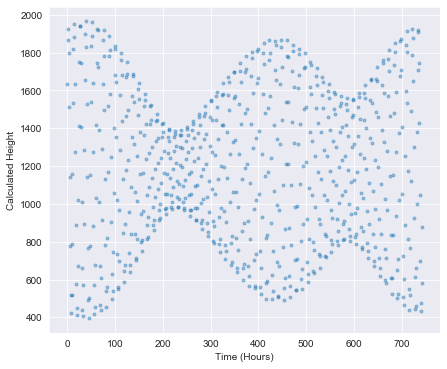

In [158]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.scatter(tide_data[0], h_t, alpha=0.4, marker='.')
plt.xlabel('Time (Hours)')
plt.ylabel('Calculated Height')
plt.savefig('model.png')

Text(0, 0.5, 'Calculated Height')

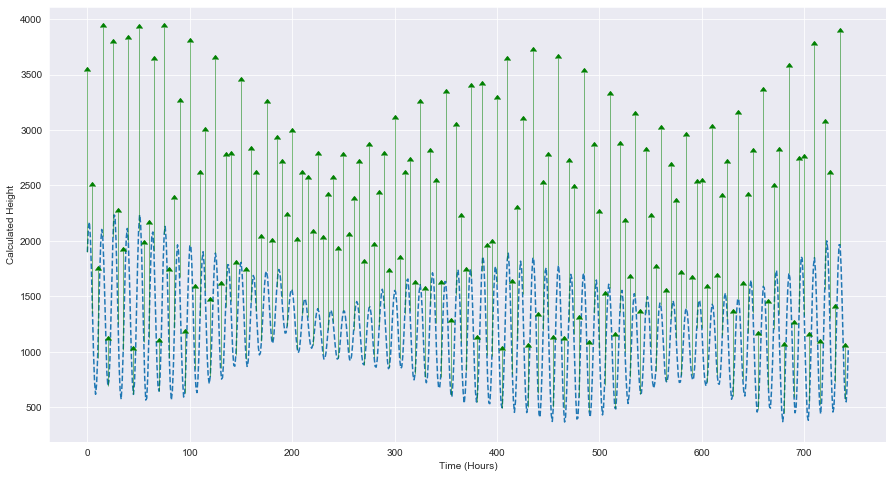

In [135]:
plt.figure(figsize=(15,8))
plt.errorbar(tide_data[0], tide_data[1], h_t, ecolor='g', 
             fmt='--', elinewidth=0.5,
             barsabove=True, lolims=True, errorevery=5)
plt.xlabel('Time (Hours)')
plt.ylabel('Calculated Error')

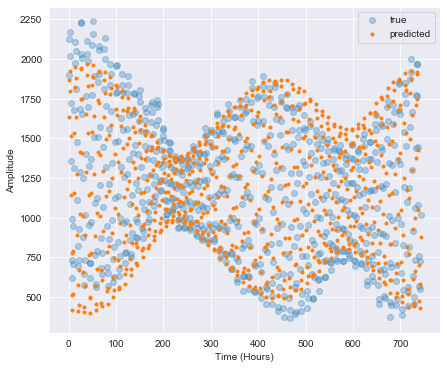

In [156]:
plt.figure(figsize=(7,6))
_ = plt.scatter(tide_data[0], tide_data[1], alpha=0.3, label='true')
_ = plt.scatter(tide_data[0], h_t, marker='.', label='predicted')
plt.legend()
plt.xlabel('Time (Hours)')
plt.ylabel('Amplitude')
plt.savefig('true_pred.png')

Text(0, 0.5, 'Amplitude')

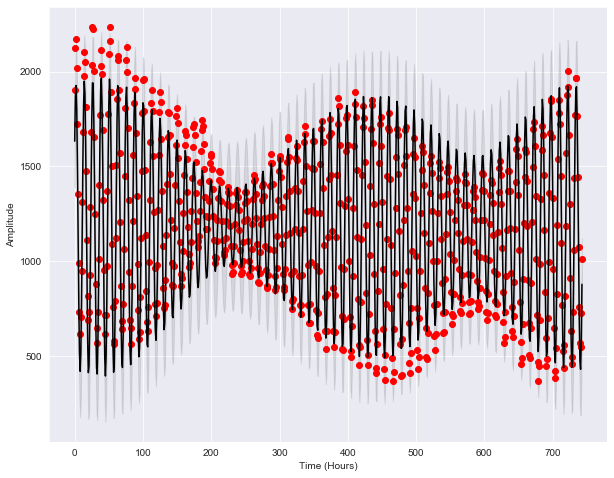

In [143]:
plt.figure(figsize=(10,8))
plt.plot(tide_data[0], tide_data[1], 'or')
plt.plot(tide_data[0],  h_t, '-', color='black')
mse = mean_squared_error(tide_data[1], h_t)
cf = 2 * np.sqrt(mse)
plt.fill_between(tide_data[0], h_t - cf, h_t + cf,
                 color='gray', alpha=0.2)
plt.xlabel('Time (Hours)')
plt.ylabel('Amplitude')

In [113]:
mae = abs(tide_data[1] - h_t)

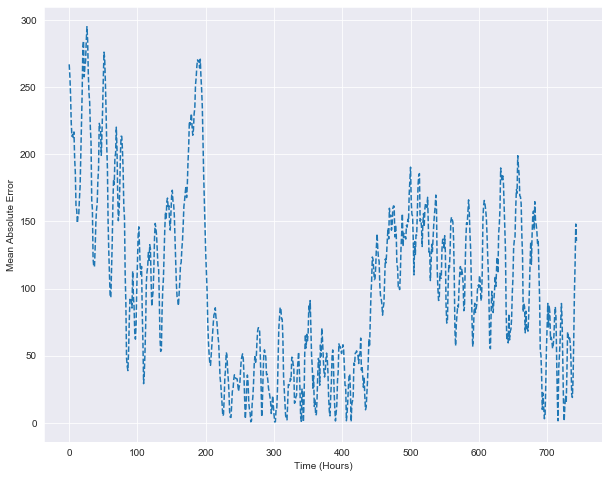

In [145]:
plt.figure(figsize=(10,8))
plt.plot(tide_data[0], mae, linestyle='--')
plt.xlabel('Time (Hours)')
plt.ylabel('Mean Absolute Error')
plt.savefig('maePlot.png')

In [148]:
max_diff = tide_data[1] - h_t
max_diff = max_diff.max()

In [149]:
max_diff

294.8598566472556